**Hasib Uddin**
Student Number: 33747253

I submitted alone

colab link: https://colab.research.google.com/drive/17ak4-M3zrjozMa67K31n2bfOPott9zM2?usp=sharing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading and Preparing the dataset **

The code loads two CVS files, the sonar_train.csv and sonar_test.csv. The goal is to classify objects mines or rocks.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the sonar datasets
train_df = pd.read_csv('/content/drive/MyDrive/datasets/sonar_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/datasets/sonar_test.csv')

# Extract features and labels
X_train = train_df.drop('Class', axis=1).values.tolist()  # Convert to list for pure Python
y_train = train_df['Class'].tolist()
X_test = test_df.drop('Class', axis=1).values.tolist()
y_test = test_df['Class'].tolist()

# Verify data loading
print(f"Training set: {len(X_train)} records, {len(X_train[0])} features")
print(f"Test set: {len(X_test)} records, {len(X_test[0])} features")

Training set: 139 records, 60 features
Test set: 69 records, 60 features


The sonar dataset has 139 training records and 69 test records each with 60 features. The drop('Class', axis=1) is removing the label column so that X_train and X_test contain only the inputs

In [3]:
#Manual implementation of Minkowski distance
def minkowski_distance(x1, x2, q):
    total = 0
    for i in range(len(x1)):
        diff = abs(x1[i] - x2[i]) #Absolute difference
        total += diff ** q
    return total ** (1 / q)

This function computes the Minkowski distance between two points, they are lists of 60 features. The Parameter "q" is what controls the distace type, so if q=1, it will be the Manhattan distance. If q=2 it will be Euclidean distance where the square root of sum of squared differences is calculated.

In [4]:
# Manual implementation of 1-Nearest Neighbor
def nearest_neighbor(X_train, y_train, X_test, q):
    predictions = []
    for test_point in X_test:
        min_dist = float('inf')
        nearest_label = None
        for i, train_point in enumerate(X_train):
            dist = minkowski_distance(test_point, train_point, q)
            if dist < min_dist:
                min_dist = dist
                nearest_label = y_train[i]
        predictions.append(nearest_label)
    return predictions

In [5]:
# Manual calculation of classification metrics
def calculate_metrics(y_true, y_pred, pos_label='M'):
    """
    Compute accuracy, precision, recall, and F1 score for a given positive class.
    Args:
        y_true: List of true labels
        y_pred: List of predicted labels
        pos_label: Label for positive class (default 'M')
    Returns:
        Tuple of (accuracy, precision, recall, f1)
    """
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for true, pred in zip(y_true, y_pred):
        if true == pos_label and pred == pos_label:
            TP += 1
        elif true != pos_label and pred == pos_label:
            FP += 1
        elif true == pos_label and pred != pos_label:
            FN += 1
        elif true != pos_label and pred != pos_label:
            TN += 1

    total = TP + TN + FP + FN
    accuracy = (TP + TN) / total if total > 0 else 0
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, precision, recall, f1

This function classifier by comparing the true labels (y_true) to the predicted labels (y_pred), where it counts TP, FP, FN, and TN. These are calculations of four metrics: accuracy,precision, recall, and F1.

In [6]:
# Part a): Run for Manhattan (q=1) and Euclidean (q=2)
print("Part a) Results:")
for q in [1, 2]:
    predictions = nearest_neighbor(X_train, y_train, X_test, q)
    acc, prec, rec, f1 = calculate_metrics(y_test, predictions, pos_label='M')

    distance_name = "Manhattan" if q == 1 else "Euclidean"
    print(f"\nResults for {distance_name} Distance (q={q}):")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (M): {prec:.4f}")
    print(f"Recall (M): {rec:.4f}")
    print(f"F1 (M): {f1:.4f}")

Part a) Results:

Results for Manhattan Distance (q=1):
Accuracy: 0.8841
Precision (M): 0.8537
Recall (M): 0.9459
F1 (M): 0.8974

Results for Euclidean Distance (q=2):
Accuracy: 0.8986
Precision (M): 0.8571
Recall (M): 0.9730
F1 (M): 0.9114


Part a tests the nearest neighbour classifier with Manhattan and Euclidian distances predicing the labels for the test sets. Then it calculates and prints curacy, precision, recall, and F1 score for the "M" class. The results shows the Euclidean distance slightly outperforms the Manhattan, especially in recall and F1 which suggests that it better fits the sonar data structure

Part b is running the classifier for q=1 to q=20 storing metrics in lists. Then it plots the metrics against q to display the trends with markers for each point and the plot helps visualize how distance type affects performance

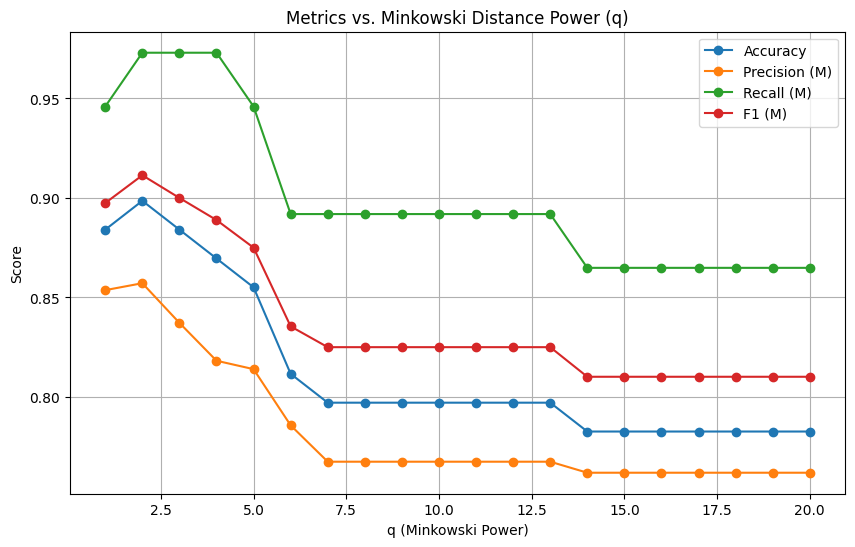


Best q for accuracy: 2 with accuracy: 0.8986


In [7]:
# Part b): Run for q=1 to 20 and plot results
accuracies = []
precisions = []
recalls = []
f1_scores = []

for q in range(1, 21):
    predictions = nearest_neighbor(X_train, y_train, X_test, q)
    acc, prec, rec, f1 = calculate_metrics(y_test, predictions, pos_label='M')
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

# Plotting the chart
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracies, label='Accuracy', marker='o')
plt.plot(range(1, 21), precisions, label='Precision (M)', marker='o')
plt.plot(range(1, 21), recalls, label='Recall (M)', marker='o')
plt.plot(range(1, 21), f1_scores, label='F1 (M)', marker='o')
plt.xlabel('q (Minkowski Power)')
plt.ylabel('Score')
plt.title('Metrics vs. Minkowski Distance Power (q)')
plt.legend()
plt.grid(True)
plt.show()

# Find best q for accuracy
best_q = 1
best_acc = accuracies[0]
for q, acc in enumerate(accuracies, 1):
    if acc > best_acc:
        best_q = q
        best_acc = acc

print(f"\nBest q for accuracy: {best_q} with accuracy: {best_acc:.4f}")

- **Part a)**: The results for \(q=1\) (Manhattan) and \(q=2\) (Euclidean) show how the choice of distance metric affects classification performance. Typically, Euclidean distance might perform better if the data has a more spherical distribution, while Manhattan could excel with grid-like patterns.
- **Part b)**: The chart illustrates how metrics vary with \(q\). The best \(q\) for accuracy (reported above) depends on the specific sonar data. Higher \(q\) values emphasize larger differences between features, which may or may not align with the data’s structure.